In [1]:
import scipy.io.wavfile as wav
import tensorflow as tf
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from math import exp
from google.colab.patches import cv2_imshow as show
import re
import os
import shutil
import librosa

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qHd-N5hezjoJDzu_JkFQ8a6_xFht4Vq_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qHd-N5hezjoJDzu_JkFQ8a6_xFht4Vq_" -O train1.zip && rm -rf /tmp/cookies.txt
!unzip train1.zip

#https://drive.google.com/file/d/1qHd-N5hezjoJDzu_JkFQ8a6_xFht4Vq_/view?usp=sharing

subjects=os.listdir("/content/train")
for i in subjects:
    path1=os.path.join("/content/train",os.path.join(i,'wav'))
    path2=os.path.join("/content/train",os.path.join(i,'thr'))
    shutil.rmtree(path1,ignore_errors=True)
    shutil.rmtree(path2,ignore_errors=True)

Streaming output truncated to the last 5000 lines.
  inflating: train/sub_3/wav/3_2_2_9_1177_1.wav  
  inflating: train/sub_3/wav/3_1_2_2_298_1.wav  
  inflating: train/sub_3/wav/3_2_2_5_1108_1.wav  
  inflating: train/sub_3/wav/3_1_2_3_514_1.wav  
  inflating: train/sub_3/wav/3_1_2_9_497_1.wav  
  inflating: train/sub_3/wav/3_2_2_1_1283_1.wav  
  inflating: train/sub_3/wav/3_1_2_6_518_1.wav  
  inflating: train/sub_3/wav/3_2_2_7_33_1.wav  
  inflating: train/sub_3/wav/3_2_2_4_150_1.wav  
  inflating: train/sub_3/wav/3_2_2_1_970_1.wav  
  inflating: train/sub_3/wav/3_1_2_6_111_1.wav  
  inflating: train/sub_3/wav/3_1_2_4_290_1.wav  
  inflating: train/sub_3/wav/3_2_2_4_1030_1.wav  
  inflating: train/sub_3/wav/3_1_2_5_790_1.wav  
  inflating: train/sub_3/wav/3_1_2_5_605_1.wav  
  inflating: train/sub_3/wav/3_2_2_3_180_1.wav  
  inflating: train/sub_3/wav/3_1_2_3_1008_1.wav  
  inflating: train/sub_3/wav/3_2_2_5_964_1.wav  
  inflating: train/sub_3/wav/3_2_2_7_1254_1.wav  
  inflating: 

In [3]:
#VOICE FEATURES

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ipT9eK-E3fTGnKJN4sHA8RIh1VbZc9VJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ipT9eK-E3fTGnKJN4sHA8RIh1VbZc9VJ" -O thermalfeature_train.zip && rm -rf /tmp/cookies.txt
!unzip thermalfeature_train.zip

#https://drive.google.com/file/d/1ipT9eK-E3fTGnKJN4sHA8RIh1VbZc9VJ/view?usp=sharing

--2023-04-12 11:32:05--  https://docs.google.com/uc?export=download&confirm=&id=1ipT9eK-E3fTGnKJN4sHA8RIh1VbZc9VJ
Resolving docs.google.com (docs.google.com)... 142.251.10.101, 142.251.10.102, 142.251.10.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dg2odp7mr7grrb2h431ltsfkvr2uobn0/1681299075000/04390747349598417958/*/1ipT9eK-E3fTGnKJN4sHA8RIh1VbZc9VJ?e=download&uuid=cd5af496-32ff-4ddb-89fc-0f460e78b72f [following]
--2023-04-12 11:32:14--  https://doc-0s-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dg2odp7mr7grrb2h431ltsfkvr2uobn0/1681299075000/04390747349598417958/*/1ipT9eK-E3fTGnKJN4sHA8RIh1VbZc9VJ?e=download&uuid=cd5af496-32ff-4ddb-89fc-0f460e78b72f
Resolving doc-0s-8c-docs.googleusercontent.com (doc-0s-8c-docs.googleusercontent.com)... 142.251.12.132, 2

In [4]:
import numpy as np
import cv2 as cv

In [5]:
import tensorflow as tf
Train1=tf.keras.utils.image_dataset_from_directory('/content/train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
)

Found 1882 files belonging to 20 classes.


In [6]:
Train2=tf.keras.utils.image_dataset_from_directory('/content/content/thermalfeature_train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
)

Found 1882 files belonging to 21 classes.


In [7]:
Train=tf.data.Dataset.zip((Train1,Train2))#img,label,feature,label

In [8]:
def mapingFunc(d1,d2):
    print(d2[0])
    return (((d1[0],d2[0])),d1[1])#(img,feature),label

In [9]:
Train=Train.map(mapingFunc)

Tensor("args_2:0", shape=(None, 128, 128, 1), dtype=float32)


tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3], shape=(32,), dtype=int32)
tf.Tensor([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

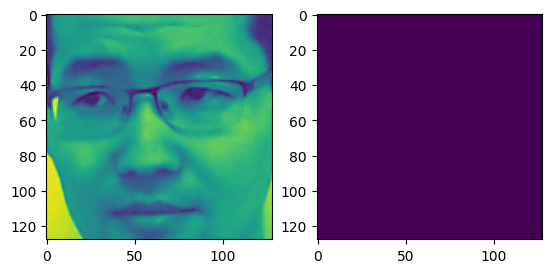

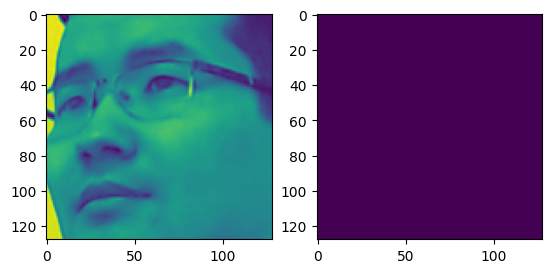

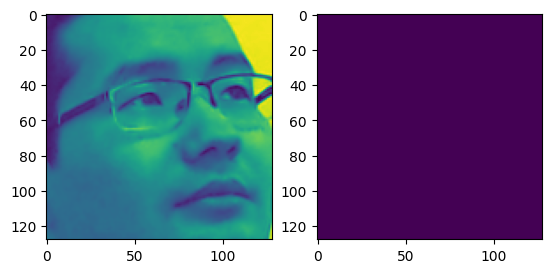

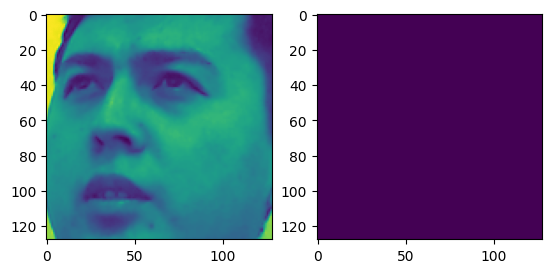

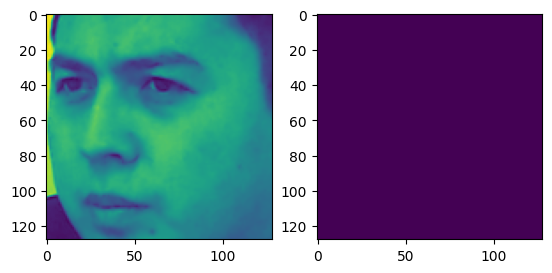

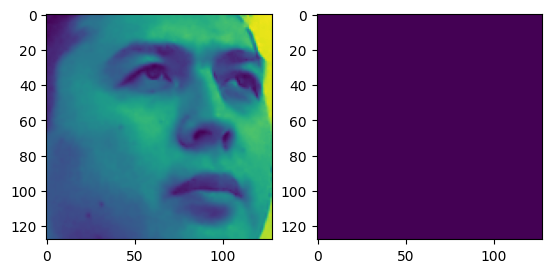

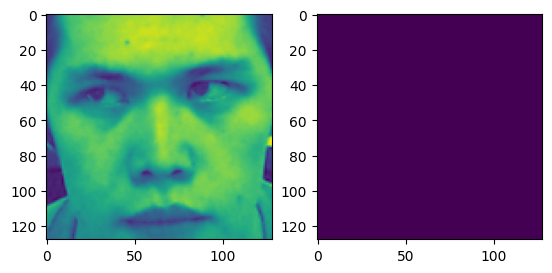

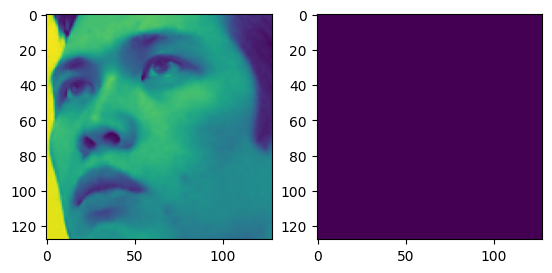

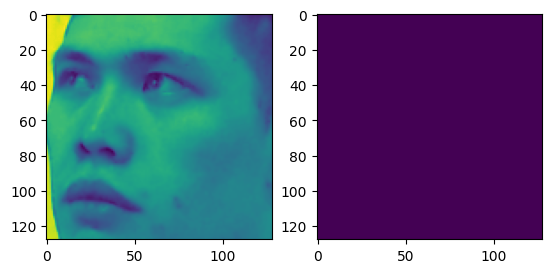

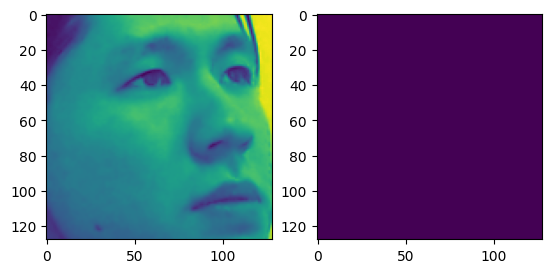

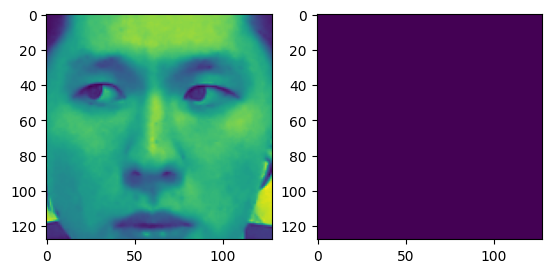

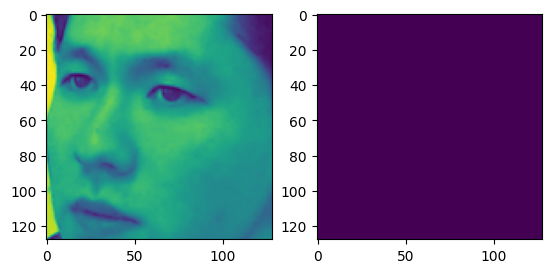

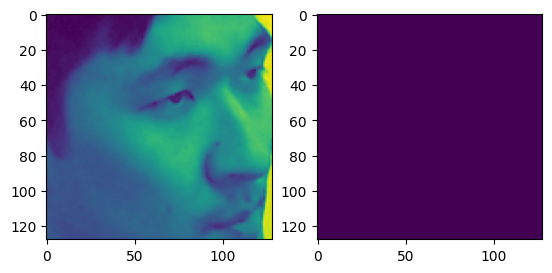

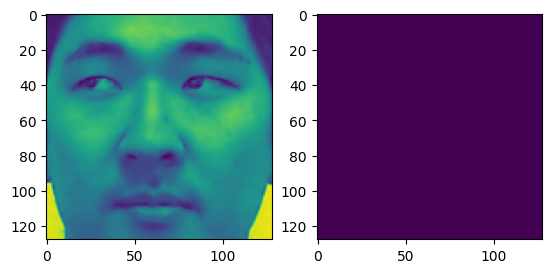

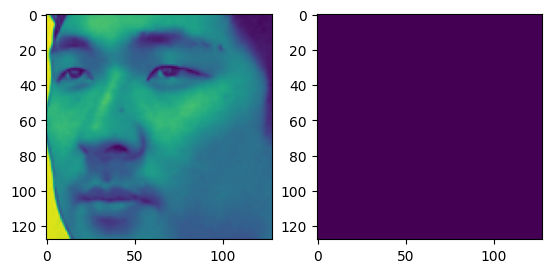

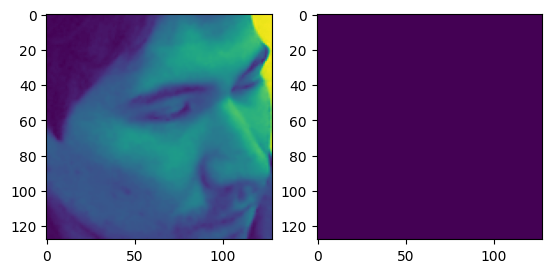

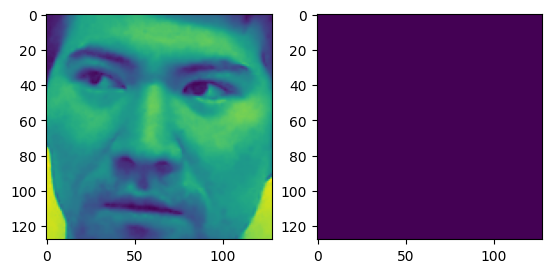

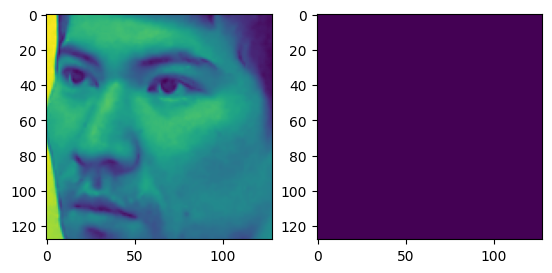

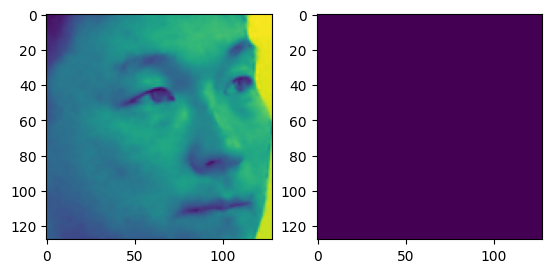

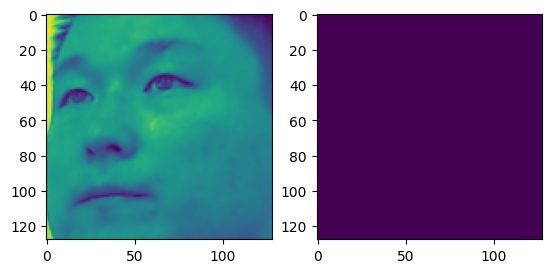

In [10]:
import matplotlib.pyplot as plt
for (img,feature),label in Train.take(20):
    num=8
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img[num])
    plt.subplot(1,2,2)
    plt.imshow(feature[num])
    print(label)


In [11]:
Train.element_spec

((TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None)),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [12]:
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=1
N=20

In [13]:
import tensorflow as tf
class Summation(tf.keras.layers.Layer):
    def __init__(self,**kwargs):    
        # self.output_dim =output
        super(Summation, self).__init__(**kwargs)
    def build(self, input_shape): 
        # self.kernel = self.add_weight(name = 'kernel', 
        #     shape = (input_shape[1], input_shape[-1]), 
        #     initializer = 'normal', trainable = False) 
        super(Summation, self).build(input_shape)
    def call(self, input1,input2,input3): 
        return (input1+input2+input3)/3

In [14]:
class sharedConvLayers(tf.keras.Model):
  def __init__(self):
    super(sharedConvLayers, self).__init__(name='')
    self.conv1=tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')
    self.conv2=tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')
    self.max1=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv3=tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')
    self.conv4=tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')
    self.max2=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv5=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')
    self.conv6=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')
    self.max3=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv7=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.conv8=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.conv9=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.flatten=tf.keras.layers.Flatten()

  def call(self, input):
    x=self.conv1(input)
    x=self.conv2(x)
    x=self.max1(x)
    x=self.conv3(x)
    x=self.conv4(x)
    x=self.max2(x)
    x=self.conv5(x)
    x=self.conv6(x)
    x=self.max3(x)
    x=self.conv7(x)
    x=self.conv8(x)
    x=self.conv9(x)
    x=self.flatten(x)
    return x



In [15]:
input1=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
input1=tf.keras.layers.Lambda(lambda x:x/255)(input1)#normalization
input2=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
input2=tf.keras.layers.Lambda(lambda x:x/255)(input2)
shared_conv=sharedConvLayers()
feature1=shared_conv(input1)
feature2=shared_conv(input2)

#Concatenation Fusion Layer
yconcate=tf.keras.layers.Concatenate()([feature1,feature2])
wconcate=tf.keras.layers.Dense(1000,activation='relu')(yconcate)
wconcate=tf.keras.layers.Dense(1000,activation='relu')(wconcate)
sconcate=tf.keras.layers.Dense(N,activation='sigmoid')(wconcate)

# #Average Fusion Layer
yavg=tf.keras.layers.Average()([feature1,feature2])
wavg=tf.keras.layers.Dense(1000,activation='relu')(yavg)
wavg=tf.keras.layers.Dense(1000,activation='relu')(wavg)
savg=tf.keras.layers.Dense(N,activation='sigmoid')(wavg)

# #Max Fusion Layer
ymax=tf.keras.layers.Maximum()([feature1,feature2])
wmax=tf.keras.layers.Dense(1000,activation='relu')(ymax)
wmax=tf.keras.layers.Dense(1000,activation='relu')(wmax)
smax=tf.keras.layers.Dense(N,activation='sigmoid')(wmax)

# out=tf.keras.layers.Lambda(lambda x,y,z: x+y+z)(sconcate,savg,smax)
# out=Summation()(sconcate,savg,smax)
model = tf.keras.Model(inputs=[input1,input2], outputs=[sconcate,savg,smax])
# model = tf.keras.Model(inputs=[input1,input2], outputs=[out])


In [16]:
# opt = tf.keras.optimizers.SGD(0.01,momentum=0.06,weight_decay=10e-3)
# opt = tf.keras.optimizers.Adam(0.01)
# opt=tf.keras.optimizers.SGD(0.001,momentum=0.0005)
opt=tf.keras.optimizers.SGD(0.001,momentum=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
  (sharedConvLayers)            (None, 131072)       7110592     ['input_3[0][0]',                
                                                                  'input_4[0][0]']            

In [17]:
model.fit(Train,epochs=80)

Epoch 1/80
59/59 [==============================] - 47s 440ms/step - loss: 8.6438 - dense_2_loss: 2.8813 - dense_5_loss: 2.8994 - dense_8_loss: 2.8632 - dense_2_accuracy: 0.1785 - dense_5_accuracy: 0.1355 - dense_8_accuracy: 0.1849
Epoch 2/80
59/59 [==============================] - 19s 325ms/step - loss: 8.6783 - dense_2_loss: 2.8648 - dense_5_loss: 2.9346 - dense_8_loss: 2.8789 - dense_2_accuracy: 0.1525 - dense_5_accuracy: 0.0701 - dense_8_accuracy: 0.1573
Epoch 3/80
59/59 [==============================] - 19s 321ms/step - loss: 8.6667 - dense_2_loss: 2.8733 - dense_5_loss: 2.9472 - dense_8_loss: 2.8463 - dense_2_accuracy: 0.1249 - dense_5_accuracy: 0.0691 - dense_8_accuracy: 0.1536
Epoch 4/80
59/59 [==============================] - 19s 318ms/step - loss: 8.9719 - dense_2_loss: 2.9810 - dense_5_loss: 2.9880 - dense_8_loss: 3.0029 - dense_2_accuracy: 0.0739 - dense_5_accuracy: 0.0383 - dense_8_accuracy: 0.0723
Epoch 5/80
59/59 [==============================] - 19s 317ms/step - los

In [24]:
model.save('thermalmodel')

In [25]:
!zip -r thermalmodel /content/thermalmodel

updating: content/thermalmodel/ (stored 0%)
updating: content/thermalmodel/saved_model.pb (deflated 89%)
updating: content/thermalmodel/keras_metadata.pb (deflated 93%)
updating: content/thermalmodel/assets/ (stored 0%)
updating: content/thermalmodel/variables/ (stored 0%)
updating: content/thermalmodel/variables/variables.data-00000-of-00001 (deflated 43%)
updating: content/thermalmodel/variables/variables.index (deflated 70%)
updating: content/thermalmodel/fingerprint.pb (stored 0%)


In [26]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [27]:
!cp -r /content/thermalmodel.zip '/content/gdrive/MyDrive/BM'
!ls -lt '/content/gdrive/MyDrive/BM' 

ls: '/content/gdrive/MyDrive/BM/BM Project IPYNB Files': No such file or directory
total 5754769
-rw------- 1 root root 2426859909 Apr 12 12:26  thermalmodel.zip
lrw------- 1 root root          0 Apr 12 06:13 'BM Project IPYNB Files' -> '/content/gdrive/.shortcut-targets-by-id/1ltilHrVNOASdvE1IQItxtLPEbzXRdAZu/BM Project IPYNB Files'
-rw------- 1 root root 2166562305 Apr  6 03:40  Weights.data-00000-of-00001
-rw------- 1 root root         71 Apr  6 03:39  checkpoint
-rw------- 1 root root       4829 Apr  6 03:38  Weights.index
-rw------- 1 root root 1299454629 Apr  6 03:30  savedmodel.zip
